### Data visualisation of Imperial College's research about Covid19

In [2]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno

In [3]:
figsize = (10, 7)
matplotlib.rcParams['figure.figsize'] = figsize

In [4]:
data = pd.ExcelFile("https://pycourse.s3.amazonaws.com/ImperialCollege-COVID19-scenarios.xlsx")

In [5]:
print(f"Worksheets availables: {data.sheet_names}")

Worksheets availables: ['Countries', 'Mitigation', 'Suppression', 'Dictionary']


In [6]:
countries_df = pd.read_excel(data, data.sheet_names[0], decimal=",")

In [7]:
countries_df.head()

,"Region, subregion, country or area *",country_code,World Bank region,World Bank income grou,GDP 2018
0,Afghanistan,AFG,South Asia,Low income,1955.006208
1,Albania,ALB,Europe & Central Asia,Upper middle income,13364.155400
2,Algeria,DZA,Middle East & North Africa,Upper middle income,15481.787620
3,Angola,AGO,Sub-Saharan Africa,Lower middle income,6452.355165
4,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,26868.133520


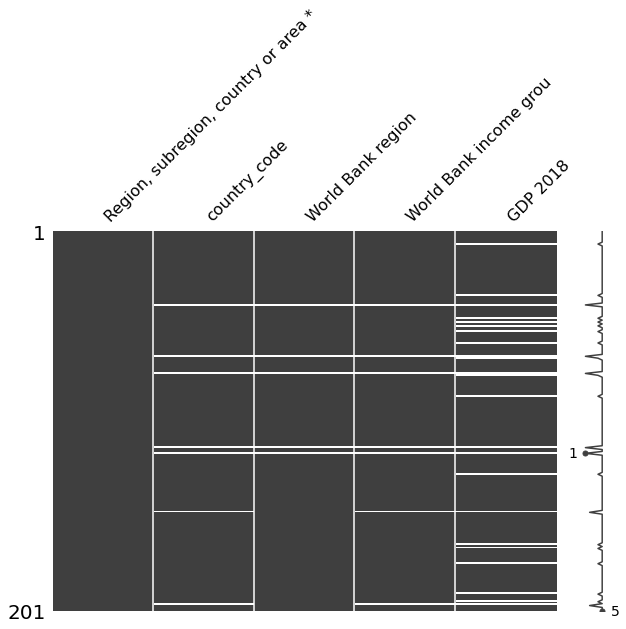

In [8]:
msno.matrix(countries_df, figsize=figsize)

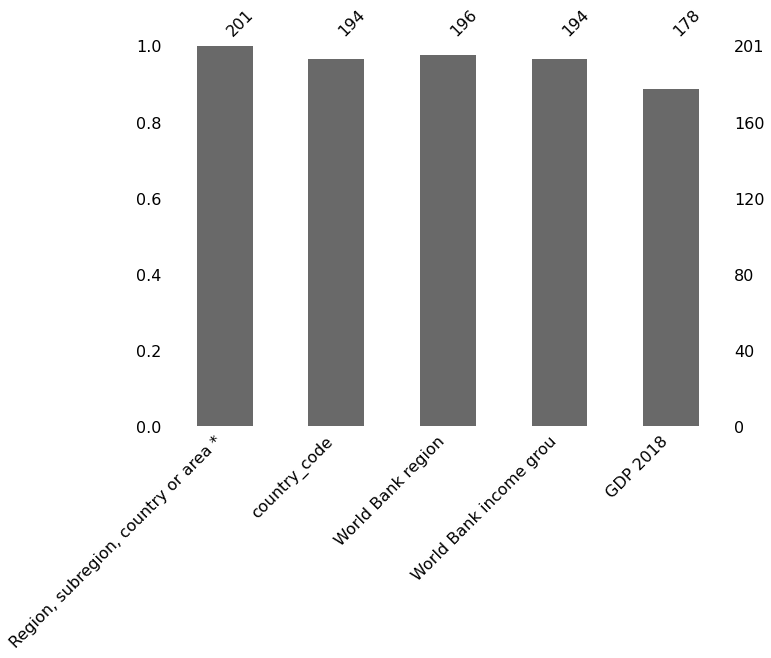

In [9]:
msno.bar(countries_df, figsize=figsize)

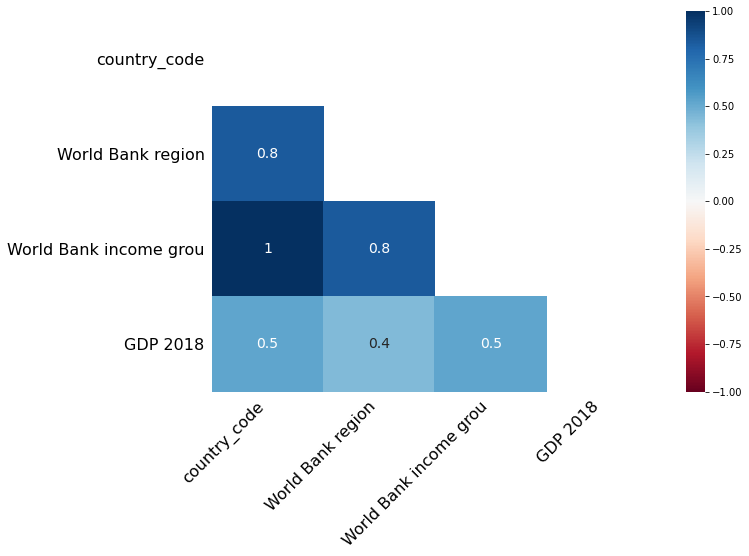

In [11]:
msno.heatmap(countries_df, figsize=figsize)